In [ ]:
import pandas as pd
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

# Updated File Path
file_path = '/content/drive/MyDrive/AI ML reference code/Life Insurance Assessment/train.csv'

try:
  df = pd.read_csv(file_path)
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
  print(f"Error: File at {file_path} is empty")
except pd.errors.ParserError:
  print(f"Error: Could not parse file at {file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Mounted at /content/drive
   Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0      

In [ ]:
df.head()


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
df['Response'].value_counts()

,count
Response,
8,19489
6,11233
7,8027
2,6552
1,6207
5,5432
4,1428
3,1013


In [ ]:
#finding % missing value

df_nan = (df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100

df_nan


,0
Medical_History_10,99.061990
Medical_History_32,98.135767
Medical_History_24,93.598963
Medical_History_15,75.101463
Family_Hist_5,70.411411
...,...
Medical_Keyword_45,0.000000
Medical_Keyword_46,0.000000
Medical_Keyword_47,0.000000
Medical_Keyword_48,0.000000


In [ ]:
df_nan_filter = df_nan[df_nan>0]

df_nan_filter

,0
Medical_History_10,99.061990
Medical_History_32,98.135767
Medical_History_24,93.598963
Medical_History_15,75.101463
Family_Hist_5,70.411411
Family_Hist_3,57.663226
Family_Hist_2,48.257860
Insurance_History_5,42.767889
Family_Hist_4,32.306630
Employment_Info_6,18.278574


In [ ]:
#removed columns which is higher thagn 90%
removed_columns = df_nan_filter[df_nan_filter>90].index

In [ ]:
df.drop(removed_columns,axis=1,inplace=True)

In [ ]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
nan_columns = df_nan_filter[df_nan_filter<=90].index
nan_columns = list(nan_columns)

In [ ]:
#finding features important with missing value <=90%

nan_columns.append('Response')

In [ ]:
df_1= df[nan_columns]

In [ ]:
df_1.describe()

,Medical_History_15,Family_Hist_5,Family_Hist_3,Family_Hist_2,Insurance_History_5,Family_Hist_4,Employment_Info_6,Medical_History_1,Employment_Info_4,Employment_Info_1,Response
count,14785.000000,17570.000000,25140.000000,30725.000000,33985.000000,40197.000000,48527.000000,50492.000000,52602.000000,59362.000000,59381.000000
mean,123.760974,0.484635,0.497737,0.474550,0.001733,0.444890,0.361469,7.962172,0.006283,0.077582,5.636837
std,98.516206,0.129200,0.140187,0.154959,0.007338,0.163012,0.349551,13.027697,0.032816,0.082347,2.456833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,0.401786,0.401961,0.362319,0.000400,0.323944,0.060000,2.000000,0.000000,0.035000,4.000000
50%,117.000000,0.508929,0.519608,0.463768,0.000973,0.422535,0.250000,4.000000,0.000000,0.060000,6.000000
75%,240.000000,0.580357,0.598039,0.579710,0.002000,0.563380,0.550000,9.000000,0.000000,0.100000,8.000000
max,240.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000,240.000000,1.000000,1.000000,8.000000


In [ ]:
#Medical_History_1: have min and max has high distance, define frequency number to be used for null. Choose '0' for it

df_1['Medical_History_1'] = df_1['Medical_History_1'].fillna(1)
#df_1['Medical_History_1'].fillna(1, inplace=True)] #2nd method


<ipython-input-14-130add8fb510>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Medical_History_1'] = df_1['Medical_History_1'].fillna(1)


In [ ]:
for col in df_1.columns:
  if col != 'Medical_History_1' and col != 'Response':
    df_1[col] = df_1[col].fillna(df_1[col].mean())

<ipython-input-15-0403a1410196>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[col] = df_1[col].fillna(df_1[col].mean())


In [ ]:
df_1.isnull().sum()

,0
Medical_History_15,0
Family_Hist_5,0
Family_Hist_3,0
Family_Hist_2,0
Insurance_History_5,0
Family_Hist_4,0
Employment_Info_6,0
Medical_History_1,0
Employment_Info_4,0
Employment_Info_1,0


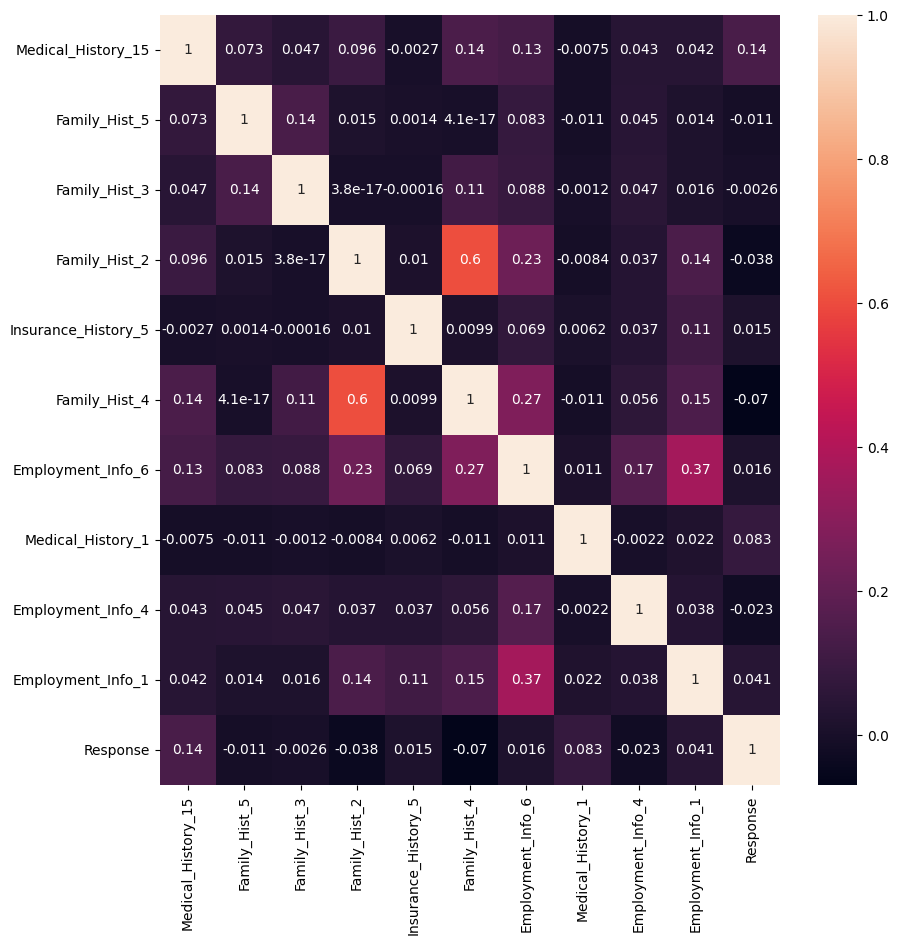

In [ ]:
#features importance
import matplotlib.pyplot as plt
import seaborn as sns

corrleation_matrix = df_1.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrleation_matrix, annot=True)
plt.show()


The above correlation display how important those features with target value. Remove all these missing value from data

In [ ]:
nan_columns.remove('Response')

In [ ]:
nan_columns

['Medical_History_15',
 'Family_Hist_5',
 'Family_Hist_3',
 'Family_Hist_2',
 'Insurance_History_5',
 'Family_Hist_4',
 'Employment_Info_6',
 'Medical_History_1',
 'Employment_Info_4',
 'Employment_Info_1']

In [ ]:
data_cleaned = df.drop(nan_columns,axis=1) #removed all missing value

In [ ]:
data_info = data_cleaned.select_dtypes(include='object')

In [ ]:
data_info['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [ ]:
#!pip install scikit-learn

In [ ]:
#using label Encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_cleaned['Product_Info_2'] = le.fit_transform(data_cleaned['Product_Info_2'])

In [ ]:
data_cleaned.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
data_corr = data_cleaned.corr()

In [ ]:
# Filter features based on correlation with 'Response'
filtered_features = data_corr[
    (data_corr['Response'] > 0.1) | (data_corr['Response'] < -0.1)
]['Response'].index

# Create a new DataFrame with only the selected features
filtered_df = df[filtered_features]

In [ ]:
filtered_df.head()

,Product_Info_4,Ins_Age,Wt,BMI,Employment_Info_3,InsuredInfo_6,Insurance_History_2,Medical_History_4,Medical_History_6,Medical_History_13,...,Medical_History_30,Medical_History_33,Medical_History_39,Medical_History_40,Medical_Keyword_3,Medical_Keyword_15,Medical_Keyword_23,Medical_Keyword_25,Medical_Keyword_48,Response
0,0.076923,0.641791,0.148536,0.323008,1,2,1,1,3,3,...,2,1,3,3,0,0,0,0,0,8
1,0.076923,0.059701,0.131799,0.272288,3,2,1,1,3,3,...,2,3,3,3,0,0,0,0,0,4
2,0.076923,0.029851,0.288703,0.428780,1,1,1,2,3,3,...,2,3,3,3,0,0,0,0,0,8
3,0.487179,0.164179,0.205021,0.352438,1,2,1,2,3,3,...,2,3,3,3,0,0,0,0,0,8
4,0.230769,0.417910,0.234310,0.424046,1,2,1,2,3,3,...,2,3,3,3,0,0,0,0,0,8


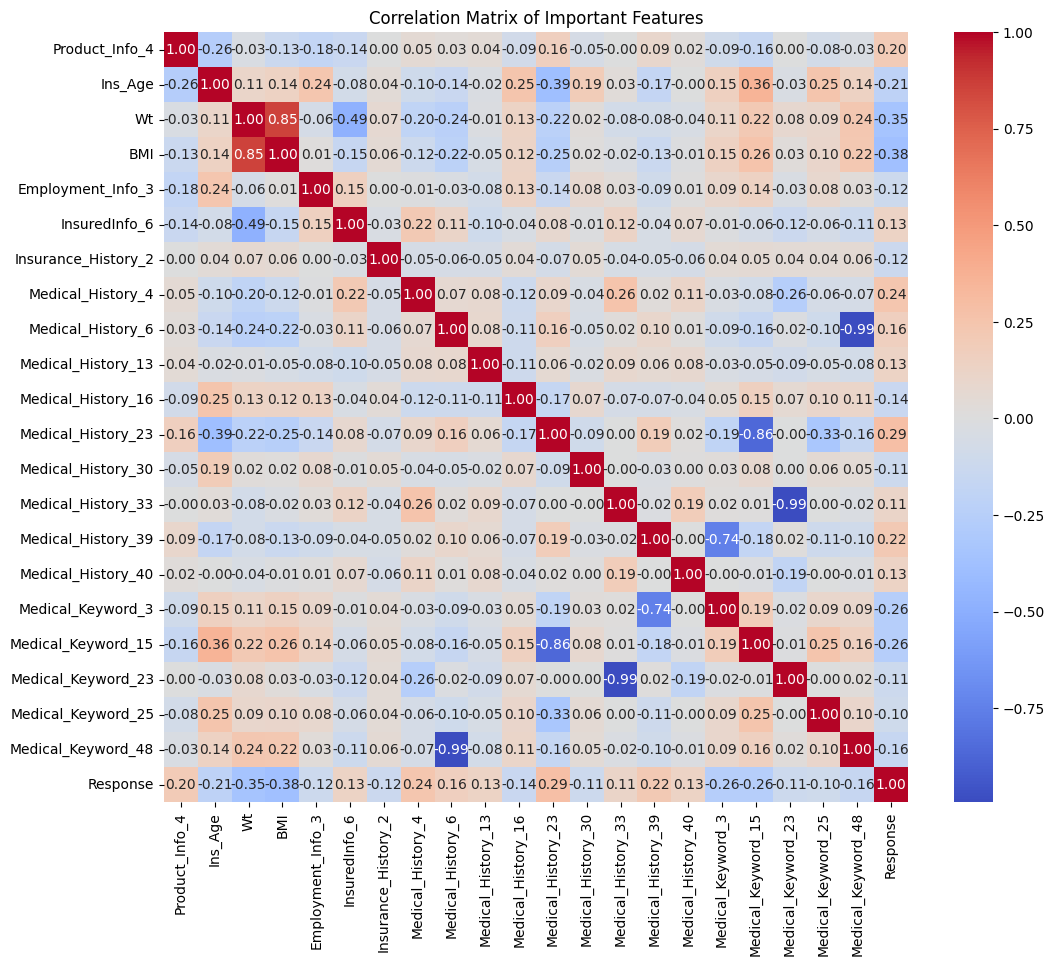

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix = filtered_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Important Features')
plt.show()

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_Info_4       59381 non-null  float64
 1   Ins_Age              59381 non-null  float64
 2   Wt                   59381 non-null  float64
 3   BMI                  59381 non-null  float64
 4   Employment_Info_3    59381 non-null  int64  
 5   InsuredInfo_6        59381 non-null  int64  
 6   Insurance_History_2  59381 non-null  int64  
 7   Medical_History_4    59381 non-null  int64  
 8   Medical_History_6    59381 non-null  int64  
 9   Medical_History_13   59381 non-null  int64  
 10  Medical_History_16   59381 non-null  int64  
 11  Medical_History_23   59381 non-null  int64  
 12  Medical_History_30   59381 non-null  int64  
 13  Medical_History_33   59381 non-null  int64  
 14  Medical_History_39   59381 non-null  int64  
 15  Medical_History_40   59381 non-null 

In [ ]:
filtered_df.to_csv('filtered_data.csv',index=False)

In [ ]:
df=filtered_df

In [ ]:
df.head()

,Product_Info_4,Ins_Age,Wt,BMI,Employment_Info_3,InsuredInfo_6,Insurance_History_2,Medical_History_4,Medical_History_6,Medical_History_13,...,Medical_History_30,Medical_History_33,Medical_History_39,Medical_History_40,Medical_Keyword_3,Medical_Keyword_15,Medical_Keyword_23,Medical_Keyword_25,Medical_Keyword_48,Response
0,0.076923,0.641791,0.148536,0.323008,1,2,1,1,3,3,...,2,1,3,3,0,0,0,0,0,8
1,0.076923,0.059701,0.131799,0.272288,3,2,1,1,3,3,...,2,3,3,3,0,0,0,0,0,4
2,0.076923,0.029851,0.288703,0.428780,1,1,1,2,3,3,...,2,3,3,3,0,0,0,0,0,8
3,0.487179,0.164179,0.205021,0.352438,1,2,1,2,3,3,...,2,3,3,3,0,0,0,0,0,8
4,0.230769,0.417910,0.234310,0.424046,1,2,1,2,3,3,...,2,3,3,3,0,0,0,0,0,8


In [1]:
### Method 1

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from scipy.optimize import minimize
from functools import partial
import warnings

warnings.filterwarnings("ignore", category=UserWarning) # Suppress some common warnings


# Define features (all columns except Response)
features = [col for col in df.columns if col not in ['Response']]
X = df[features]
y = df['Response'] # Target variable (should be integers 1-8)

print(f"Features being used ({len(features)}): {features}")
print(f"Target variable: Response")
print(f"Training data shape: {X.shape}")
# print(f"Test data shape: {X_test.shape}") # Uncomment if using test_df

Features being used (21): ['Product_Info_4', 'Ins_Age', 'Wt', 'BMI', 'Employment_Info_3', 'InsuredInfo_6', 'Insurance_History_2', 'Medical_History_4', 'Medical_History_6', 'Medical_History_13', 'Medical_History_16', 'Medical_History_23', 'Medical_History_30', 'Medical_History_33', 'Medical_History_39', 'Medical_History_40', 'Medical_Keyword_3', 'Medical_Keyword_15', 'Medical_Keyword_23', 'Medical_Keyword_25', 'Medical_Keyword_48']
Target variable: Response
Training data shape: (59381, 21)


In [ ]:
# --- 2. QWK Metric Function ---
def quadratic_weighted_kappa(y_true, y_pred):
    """Calculates QWK score using sklearn"""
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

In [ ]:
# --- 3. Threshold Optimization ---
class OptimizedRounder:
    """
    An optimizer class that finds the best thresholds for converting
    continuous predictions into discrete integer classes (1-8)
    to maximize the Quadratic Weighted Kappa score.
    """
    def __init__(self):
        self.coef_ = None  # Initialize coef_ to None instead of 0
        self.init_thresholds_ = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5] # Initial guesses

    def _kappa_loss(self, thresholds, predictions, true_values):
        """Objective function to minimize (1 - QWK)"""
        preds_int = self._apply_thresholds(predictions, thresholds)
        return -quadratic_weighted_kappa(true_values, preds_int) # Minimize negative kappa

    def _apply_thresholds(self, predictions, thresholds):
        """Applies thresholds to continuous predictions"""
        # Ensure thresholds are sorted
        sorted_thresholds = np.sort(thresholds)
        preds_int = pd.cut(predictions,
                           bins=[-np.inf] + list(sorted_thresholds) + [np.inf],
                           labels=list(range(1, len(sorted_thresholds) + 2)), # Labels 1 to 8
                           right=False) # Ensure intervals are [min, max)
        return preds_int.astype(int)


    def fit(self, predictions, true_values):
        """Find the optimal thresholds"""
        # Make sure predictions and true_values are numpy arrays
        predictions = np.array(predictions)
        true_values = np.array(true_values)

        loss_partial = partial(self._kappa_loss, predictions=predictions, true_values=true_values)

        # Adjust initial thresholds slightly based on prediction distribution
        # This can sometimes help the optimizer find a better solution
        pred_quantiles = np.quantile(predictions, np.linspace(0, 1, 10))[1:-1] # Roughly percentiles
        initial_guess = np.mean([self.init_thresholds_, pred_quantiles[:7]], axis=0)


        # Use scipy.optimize.minimize to find best thresholds
        # 'Nelder-Mead' is often robust for this type of problem
        result = minimize(loss_partial,
                          initial_guess,
                          method='Nelder-Mead', # or 'L-BFGS-B', 'SLSQP'
                          options={'maxiter': 1000, 'fatol': 1e-7} # Increase maxiter if needed
                         )

        if result.success:
            self.coef_ = np.sort(result.x)
            print(f"Optimized Thresholds: {self.coef_}")
        else:
            # Fallback to initial thresholds if optimization fails
            self.coef_ = np.sort(self.init_thresholds_)
            print(f"Optimization failed. Using initial thresholds: {self.coef_}")
            print(f"Optimization result message: {result.message}")


    def predict(self, predictions):
        """Apply the optimized thresholds to new predictions"""
        if self.coef_ is None:  # Check if coef_ is None instead of 0
            raise ValueError("Optimizer has not been fitted yet.")
        return self._apply_thresholds(predictions, self.coef_)

In [ ]:
# --- 4. Cross-Validation and Model Training ---
N_SPLITS = 5 # Number of folds for cross-validation
SEED = 42   # Random seed for reproducibility

# Configure XGBoost parameters
# **NOTE:** These parameters are just examples. You MUST tune them!
# Use libraries like Optuna or Scikit-learn's GridSearchCV/RandomizedSearchCV
xgb_params = {
    'objective': 'reg:squarederror', # Use regression objective
    'eval_metric': 'rmse',          # Evaluate with RMSE during training
    'eta': 0.05,                   # Learning rate
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'min_child_weight': 1,
    'gamma': 0.1,
    'lambda': 1,                   # L2 regularization
    'alpha': 0,                    # L1 regularization
    'seed': SEED
}

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)

oof_preds = np.zeros(len(df)) # To store Out-Of-Fold predictions (continuous)
# test_preds = np.zeros(len(X_test)) # To store test predictions (continuous) # Uncomment if using test_df
fold_scores = []
models = [] # Store trained models if needed

print(f"\nStarting {N_SPLITS}-Fold Cross-Validation...")

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")

    # Split data for this fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Create XGBoost DMatrix (efficient data structure)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    # dtest = xgb.DMatrix(X_test) # Uncomment if using test_df

    # Train the XGBoost model
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=2000,        # Max number of boosting rounds
        evals=[(dtrain, 'train'), (dval, 'val')],
        early_stopping_rounds=50,    # Stop if validation score doesn't improve
        verbose_eval=100             # Print evaluation results every 100 rounds
    )

    # --- Predict on validation set (continuous) ---
    val_preds_cont = model.predict(dval, iteration_range=(0, model.best_iteration))
    oof_preds[val_idx] = val_preds_cont # Store OOF predictions

    temp_rounder = OptimizedRounder()
    temp_rounder.fit(val_preds_cont, y_val)
    val_preds_int = temp_rounder.predict(val_preds_cont)
    fold_qwk = quadratic_weighted_kappa(y_val, val_preds_int)
    fold_scores.append(fold_qwk)
    print(f"Fold {fold+1} QWK: {fold_qwk:.4f}")

    models.append(model) # Optional: Store the model

print(f"\n--- Cross-Validation Finished ---")
print(f"Average Fold QWK: {np.mean(fold_scores):.4f} +/- {np.std(fold_scores):.4f}")


Starting 5-Fold Cross-Validation...
--- Fold 1/5 ---
[0]	train-rmse:2.43510	val-rmse:2.43431
[100]	train-rmse:1.95553	val-rmse:1.95459
[200]	train-rmse:1.92868	val-rmse:1.94710
[290]	train-rmse:1.91165	val-rmse:1.94644
Optimized Thresholds: [2.09259911 3.73084641 4.22071546 4.9657891  5.56530216 6.25532128
 6.64417746]
Fold 1 QWK: 0.5937
--- Fold 2/5 ---
[0]	train-rmse:2.43445	val-rmse:2.43466
[100]	train-rmse:1.94635	val-rmse:1.99131
[200]	train-rmse:1.91960	val-rmse:1.98867
[212]	train-rmse:1.91733	val-rmse:1.98889
Optimized Thresholds: [2.12814201 3.3780427  4.28644975 4.91383531 5.6468352  6.14787167
 6.55744081]
Fold 2 QWK: 0.5708
--- Fold 3/5 ---
[0]	train-rmse:2.43436	val-rmse:2.43502
[100]	train-rmse:1.95315	val-rmse:1.97105
[200]	train-rmse:1.92651	val-rmse:1.96251
[300]	train-rmse:1.90819	val-rmse:1.96105
[340]	train-rmse:1.90152	val-rmse:1.96093
Optimized Thresholds: [2.52418454 3.25223157 4.37905917 4.68798083 5.5533273  6.02311383
 6.777171  ]
Fold 3 QWK: 0.5861
--- Fold 

In [ ]:
# --- 5. Final Threshold Optimization and OOF Score ---
print("\nOptimizing thresholds on combined Out-Of-Fold predictions...")
final_rounder = OptimizedRounder()
final_rounder.fit(oof_preds, y) # Use all OOF predictions and true labels

# Calculate overall OOF QWK score using the final optimized thresholds
oof_preds_int = final_rounder.predict(oof_preds)
overall_oof_qwk = quadratic_weighted_kappa(y, oof_preds_int)
print(f"\nOverall OOF QWK Score (using final thresholds): {overall_oof_qwk:.4f}")
print(f"Final Optimized Thresholds: {final_rounder.coef_}")

print("\n--- Process Complete ---")


Optimizing thresholds on combined Out-Of-Fold predictions...
Optimized Thresholds: [2.26936293 3.81919134 4.45872513 4.95361219 5.587295   6.24456104
 6.61314712]

Overall OOF QWK Score (using final thresholds): 0.5808
Final Optimized Thresholds: [2.26936293 3.81919134 4.45872513 4.95361219 5.587295   6.24456104
 6.61314712]

--- Process Complete ---


I am working on improving of this model. As next step will develop further on improving features part